In [32]:
import webMining as wm
from IPython.core.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
from matplotlib import patches
import requests
import numpy as np
import subprocess
#import mpld3
#mpld3.enable_notebook()

Start Web Driver

In [33]:
web_driver_process = subprocess.Popen('../WebDriver/geckodriver')

Retrieve HTML Document

In [34]:
url = 'https://www.google.com/search?biw=1848&bih=941&tbm=shop&sxsrf=ALeKk00p2zmcyso-NkzjayBEB8a7IEvnvQ%3A1617833192330&q=nvidia%20rtx&tbs=vw%3Al%2Cmr%3A1%2Croot_cat%3A530613%2Cinit_ar%3ASgeyBAQItbEg%2Cprice%3A1%2Cppr_min%3A2000%2Cppr_max%3A30000&ei=6CxuYOjVE9u95OUP0PC3qAM&ved=0ahUKEwjo6e-lku3vAhXbHrkGHVD4DTUQuisI7wQoAw'

try:
    wd = wm.FireFoxWebDriver()
    wd.newSession()
    wd.go(url)
    pageSource = wd.getPageSource()
    wd.deleteSession()
    f = open('doc.html', 'w')
    f.write(pageSource)
    f.close()
finally:
    web_driver_process.terminate()


Instantiate DOM tree and extractor

In [36]:
doc = wm.DOM(url, pageSource)
#doc = wm.DOM('doc.html')
dsre = wm.DSRE()
dsre.setMinPSD(20)
#dsre.setMinCV(0.6)

Extract

In [37]:
#%%timeit
dsre.setUseFourier(True) # False = Lazy FFT (faster), True = Full FFT
dsre.extract(doc)

<ipython-input-37-b77a20a4ebb2>:3: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dsre.extract(doc)
<ipython-input-37-b77a20a4ebb2>:3: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dsre.extract(doc)
<ipython-input-37-b77a20a4ebb2>:3: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dsre.extract(doc)
<ipython-input-37-b77a20a4ebb2>:3: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dsre.extract(doc)


Iterate over the extracted regions:
    - content: True/False;
    - sequence: region's subsequence;
    - transform: region's Fourier Transform;
    - table: extracted records (rows x cols);
    - rows: number of records.

In [38]:
regions = []
for reg in range(0, dsre.regionCount()):
    region = dict()
    dr = dsre.getDataRegion(reg)
    region['content'] = dr.isContent()
    region['sequence'] = dr.getSequence()
    region['transform'] = dr.getTransform()
    region['table'] = dr.getTable()
    region['rows'] = len(region['table'])
    region['start'] = dr.getStartPos()
    region['end'] = dr.getEndPos()
    regions.append(region)

Displays a table with the results of each region

'Region #0 - content, 20 records'

'<table>\n<tbody>\n<tr><td>Placa De Video Nvidia Titan Rtx                                                                                  </td><td>R$\xa029.999,99</td><td>R$\xa029.999,99.</td><td>nvidiastore.com.br   </td><td>·             </td><td>·      </td><td>·                    </td><td>&lt;img class=TL92Hc c22 data-atf=1 id=srpresultimg_17447146453397876322_1_0 src=data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIALQBDgMBIgACEQEDEQH/xAAcAAABBAMBAAAAAAAAAAAAAAAABAUGBwECAwj/xABLEAABAwMBAwgECQkGBgMAAAABAAIDBAURIQYSMQcTIkFRYXGRMlKBsRQVI0JicqHB0SUzU4KSk6Ky8CRDVMLS4RY1RFVjczTi8f/EABgBAQEBAQEAAAAAAAAAAAAAAAABAgME/8QAIhEBAQACAgMAAgMBAAAAAAAAAAECERIxAyFBIlETQmEy/9oADAMBAAIRAxEAPwC8UIQgEKL3za+ntd6Zbi0uIi5yV+PQ4YH25THdNtNoKSJ1RQWqjuNKP7ynlcXDxZjPllZ5Tel1e1hk4GVoZ4gcGRg/WC8+7T8q9fdYTTRujohwfGxzsnxy0FQKW4tmkL5akPc7iS4rSPX/AD8X6WP9oIE0Z4SM/aC8emrhPGcY+i/VYFTS/wCJl/e/7IPYvOM9dvmjfb6w815Aiex7d6KSqc3OMtcT7mro3e6hXfxf6UHrvfb6w80bw7R5ryOWykaNr/YHH/Kt4nVrWNHNVjiBqeZk1Pkh7et0Lz1sVf8AbG2S5tlDXVdK44dDUQyc2T3OI6J8FZVLtHtjUludn6GEOOAZqvHnjKm4J2hRqnrtpZY958NnZ3CaR3+VZkuF9iG9J8TtHa6SQD3Jyi6SRChjtpbrz3MwfE9RIeDYpnk+5b/Hu0f/AG+g/eP/AAU54nGpghRAXzaMnAt9B+9f+CDfdpAcG3W/98/8E54nGpehQ/492iABNvt+v/nd+C2F92gzg2+gz/7nfgnPE41LkKIf8QX0caCh/fO/BZG0F8/7fRfvnfgnPE41LkKKi/3ZjQ6eloIwfWmf/pXT49r3NyxtsJ7DUPH+ROcNVJkKLOvl9xmK3W6X6ta4e9gSSXafaSInGy3Pf+mtjOfMhOUNJohQM7bXpo+U2WqWHsL977W5H2rQbf3Q8dmKrzd/pTlDSfoVdzcoV3jLdzZKrkbnpYe4HHd0UtoeUWme8sulnudA7QjegLx9ivKJpN0JootpbRWgczWAE9UrHRn+IBOrHteMscHDtByksojV0uO0tvrnmK3UdVbwMiZsjmuHcWgHh28PBcZNs2Qxc7LTt3BgEseX+4KWqNXXYmy3CqkrBTMgrJDl00cbCSe0hwIz34yqKo2xv8VZtPU18MUghfExoJaeoDPuSK013wquiax2jjrunj4pPcLhcaiRwmmYRkgYhATK+ofbCa1jsytIxoAPILnnhb01jlpb1HcqxtbHTc610TNAx0bTjzCkbaCjdlzqWIuPE7qrrY67/G9W2Yt3XdYVmx+iuGP+utchbqL/AAsX7Kz8W0X+Fi/ZShN11uzLfLS0zYzNU1TiI4w7AAHpOceoBaupNs+6WtpKdow2FoHYFv8ABaf9EEnpqwvqX00vNc61u8DE/ea4dq0u14pLTCH1UnSd6ETdXP8AAfepvHW11d6LBSU/6Fq4ubQjO7DG8jjujIHieAUUvG1UNBCyov0ppWza09viG9NMPq9ne7AUHvvKXe543NtUUNqpxozdAlm9rnDA8GjTtVxxufU9JlZj2uHmYHjfbRQ7vHfc3I88Y+1cectLXFslTaGO9V7o8/zLyxd7tcbpMXXKvqqtwdnM8zn48MnROVopYfgDXywxuc4k5c0FdJ4ozzemjTxzt3qCCikd+lp3t+4Ko9v37Q0N5mfVx1FPRufu07i0Fjhj1h19x1VaVdQKWpbJREwSN4PhO4R7QpHY+UTaGNrbfcHMvdC84NNcOmfESekD35OOxanjmNTltmO73CJ+/HUbrvW3Rld/j+7n/rn/ALITpJabXtDFLU7KmSKtiaX1FnqD8qwDi6M8Ht8NVGcY0Iwe9bkjN2cTfLq7jXP/AGQs/Hd0xj4dJjs3Qm5ZV1DZf8c3T/GyI+Obru7pr5sdm9okKE1AsF2uQORWyg8NFn42uf8AjpfNIws4TUNlT7ncX+lWSHxKyy6XNp6FdO3weUlxngnChp8uO6NW+m7GQz/f3e/OWos2U0ldfd7LblVNdjIAkJOO3U6DxVo23aaF0LKhocYImjn6uQiOJhxrl7iBnwVcXi4UWy9K01sIqLhIN+GgJOGg8Hznj4Nzk9eAosLzW3xstZdJjNJG7dhbjdjhbjgxg0aPALnxuTW9Lnr+UnYynlLJrgySTrFNSmQftbuD5reh2+2Sq3tENxpow49H4bSugB/XxurzdMXTVLt3UudgBPt0qGUdDHQsw7daARhX+KM8q9PwGlmA3YYgXN3m4a0hze1pGhHguvMQjTmox+qF5r2A2uu+z1a2ngEtVQE70tGXaN+kzPoO4+OcHK9DW+4Q3mkoq2gkbNQ1UbiHluQTwAcOojpZ7xhYynFqXZbzEP6Jn7ISq1xtZNIWNDRujgMLjjd0znHYlVtGkp+kArh2UuWCsrBXZh5RphKyV7oqgZlkle6KXUHD3DTs4BdL4wC3TuI9EZW8Dmto3vkidIwSSHQZLRzrskLrtLDzVnldvZL497hw1wqh+5KukQ7HUFcUfoqoOSYdAHuCt5h0Xlndd/jplIqu3xVFfTV3NxSTU7HxtbLkAtdgnUcOHYQUsyk1fVilgMm7vOPRYwH03HgEvRDFXSwWOtibAaZlVO0xUdMX4YzOpLncT6IAHE8B3QLafaOTZwyTSFtdtJLqXygOjoB1dHgZO7g3xT9tjd27PsjMXNS7R1rC6KZzcmki4OkAPDPotHdnXGtU3SEuhdklx1JJOST2k9Z71fF4Zfd6TPP5DZTXGpq718MraiSeond8rLK7LnE9p8k63N2IioyCY5ARxacp+ucgfTNeODm5XpjkYHauKkdVIKShjibxDAEx0DOdrIWH1gT4DVd7rUmacgHQJAjkeZH5UhtFG2jg56YYlcOv5o7E22unYwfC6kdBvoNPzj2rFdcnzuw04b3JAtrLm+nqoKqimfBVQP3opozhzD3FS99TBtlaJ7zTRshvVG0OudNGN1szP07B/MPb41oA+V+GtLnHqAypFs7LX7NXCC9QObzlOcugJ0lj+cx3cRkKUhUgJ42nt1PQXIPt5LrdWRNqqN2P7p+oHiDkexNIWojLAC9owTk8G8T4KaXbY+ks1sqrlUS1M8ZaBTUzY92WFz25aaj1cdnWezgo3s7B8K2gtkGXN5yriblvEdIahOt2oW0cdfVQbT0VVLOSJIYJpHvmaXcHEjB7dexc8771tqI2jKFxqZRFEXdi6bRyqa3mXhkY3nk4AGuqnlivp2XsJNKYZKiua6OIyRhxlkGr5NfmM4D1nE9Q0R8iVhhuF4q9proAKG1NLml/Ay4Jz+q3XxIUJ2x2gqL3tTUXQtETOcIpomtwI4gTutx7cnvJXOzdVw2jkkmqHzTSOkle8ufI85LieJJ
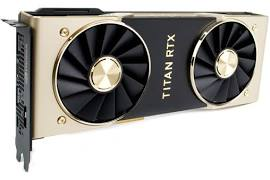
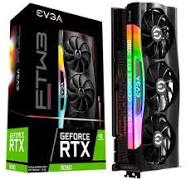
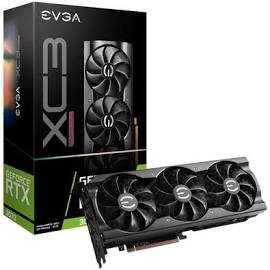
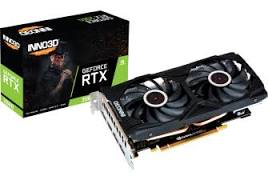

'Region #1 - noise, 21 records'

'<table>\n<tbody>\n<tr><td>&lt;img data-atf=0 role=presentation src=https://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcQLDyYXaAK0p692oqXkVbXUs78le6BXhqvt2fVIfUJWRm6Dfb5Du5QN48TCywa85zagZggeLb1d&amp;usqp=CAE /&gt;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
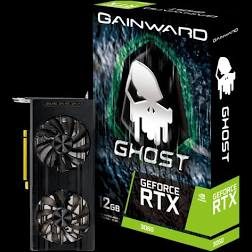
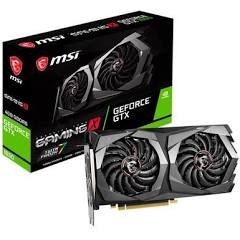
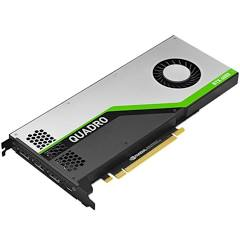
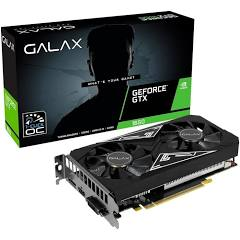
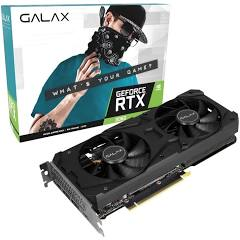
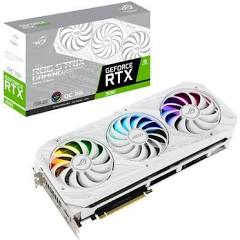
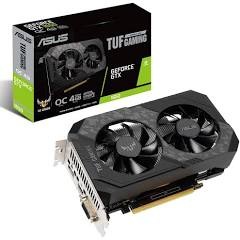
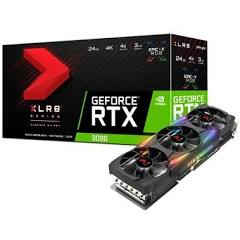
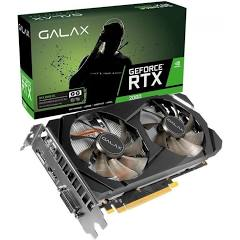
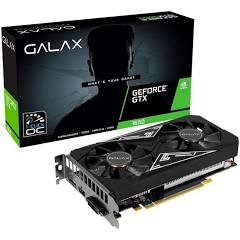
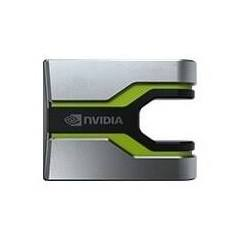
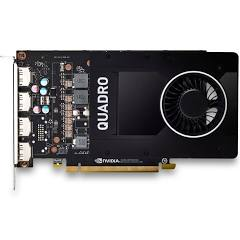

'Region #2 - noise, 32 records'

ASUS,
PNY,
GIGABYTE,
EVGA,
MSI,
ZOTAC,
PowerColor,Processador gráfico
ASUS,
PNY,
GIGABYTE,
Gainward,


'Region #3 - noise, 3 records'

‎,· ‎,· ‎,Classificação,"de dell.com: 4,9 - 323 comentários",Monitores Gamers,Acessórios Gamers,Rtx | MercadoLivre.com.br,Anúncio,·,informatica.mercadolivre.com.br/,informatica.mercadolivre.com.br/,Anúncio,·,"Frete Grátis* em Acessórios para Notebook você Encontra no Mercado Livre! As Top Marcas em Informática com as Melhores Ofertas em Até 12x S/ Juros. Ofertas Até 60% Off. Eletroeletrônicos em 12x. Não Perca, Aproveite. Mega Saldão.",· ‎,Notebooks Alienware,Frete Grátis na Dell,,Sobre o anunciante,Por que esse anúncio?,Sobre o anunciante,Por que esse anúncio?
‎,· ‎,"Os melhores Preços do Brasil Maior Loja Gamer da América Latina. Melhor Preço do Brasil. ABYSSUS. Tudo para Gamers. Razer Spectre 5600DPI. NAGA. Maior Loja Gamer. DEATHADDER. Melhores PCs Do Brasil. Tipos: Placa Mãe, Processadores, Headsets.",Classificação,"de mercadolivre.com.br: 5,0 - 512 comentários",Mega Saldão Mercado Livre,Enviando Normalmente,"GeForce RTX 2060 6GB GDDR6 OC 192-bit, GV-N2060OC-6GD",Anúncio,·,www.pichau.com.br/,www.pichau.com.br/,Anúncio,·,,,,,,Sobre o anunciante,Por que esse anúncio?,Sobre o anunciante,Por que esse anúncio?
‎,· ‎,· ‎,Classificação,"de pichau.com.br: 4,5 - 16.748 comentários",Monte Seu PC Gamer,Pcs Gamer,,,,,,,,· ‎,· ‎,Processadores Intel,Processador AMD,PC Gamer I5,,,,


In [40]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[region['content']] + ', ' + str(region['rows']) + ' records')
    display(tabulate(region['table'], tablefmt='html'))

Plot the sequence of the document and the subsequence+transform of each region

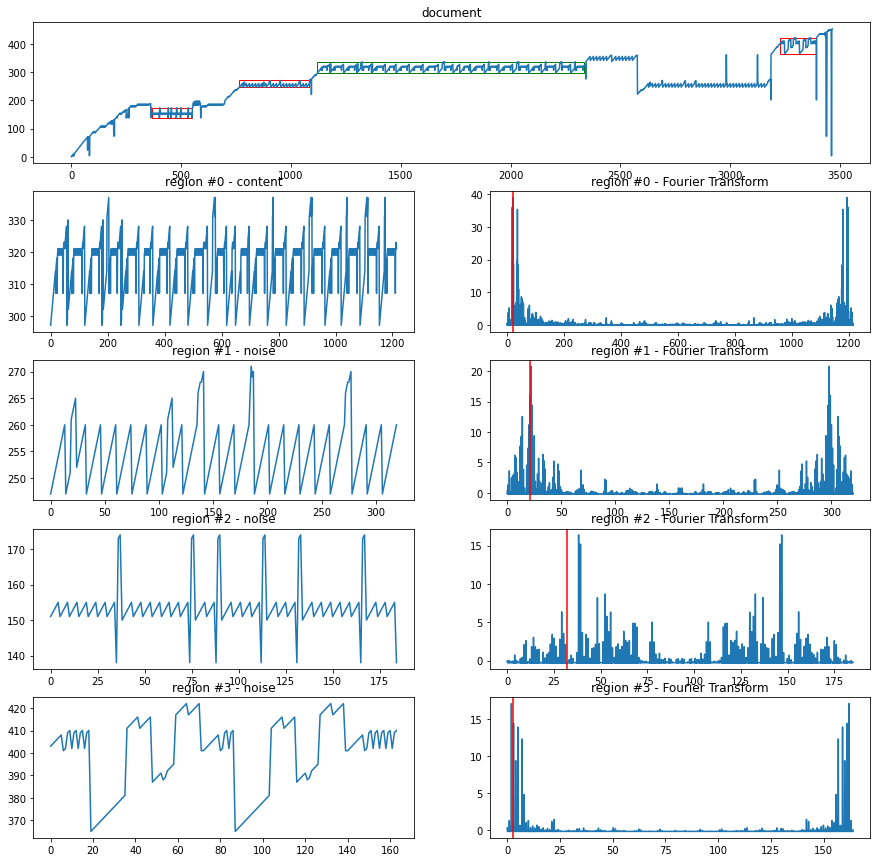

In [41]:
#%matplotlib notebook
rows = len(regions) + 1
plt.figure(figsize=(15,15))
ax = plt.subplot(rows, 1, 1)
plt.title('document')
plt.plot(dsre.getSequence())
for i, region in enumerate(regions):
    
    xy = (region['start'], min(region['sequence']))
    width = region['end'] - region['start']
    height = max(region['sequence']) - min(region['sequence'])
    color = "green" if region['content'] else "red"
    ax.add_patch(patches.Rectangle(xy, width, height, color=color, fill=False))
    
    plt.subplot(rows, 2, (i+1)*2 + 1)
    plt.title('region #' + str(i) + ' - ' + content_string[region['content']])
    plt.plot(region['sequence'])
    plt.subplot(rows, 2, (i+1)*2 + 2)
    plt.title('region #' + str(i) + ' - Fourier Transform')
    sequence_len = len(region['sequence'])
    transform_len = len(region['transform'])
    plt.plot(
        np.linspace(0, sequence_len, transform_len), 
        region['transform'][0:transform_len])
    plt.axvline(region['rows'], min(region['transform']), max(region['transform']), c='r')
    plt.plot()